# basic methods

In [98]:
import pandas as pd

In [23]:
#read the database file with inserting it into a dataframe
#save this dataframe in a variable named "data"
data=pd.read_table('titanic_data.txt')
#data=pd.read_excel("file.xls")
#dta=pd.read_csv("file.cvs")

In [24]:
#get an overview of the first 5 rows of the dataframe
data.head()
#get an overview of the last rows of the data frame
data.tail()

,pclass,survived,name,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,"14,4542",NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,"7,225",NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,"7,225",NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,"7,875",NaN,S,NaN,NaN,NaN


In [25]:
#visualize the array's dimension
data.shape
#the database consists of 1309 rows and 14 columns

(1309, 14)

# Data cleaning

# the drop() method

In [7]:
# obtain the column names
data.columns

Index(['pclass', 'survived', 'name', 'genre', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [26]:
#remove unnecessarry columns  along axis 1 of the data
data=data.drop(['name', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)
data.shape

(1309, 4)

In [27]:
#visualize the obtained result
data.head()

,pclass,survived,genre,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [28]:
# describe statistics 
data.describe()
#interpret the difference in the count of  information
#betxeen the "pclass" and 'age' variables: missing data

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Text(0, 0.5, 'valeaurs')

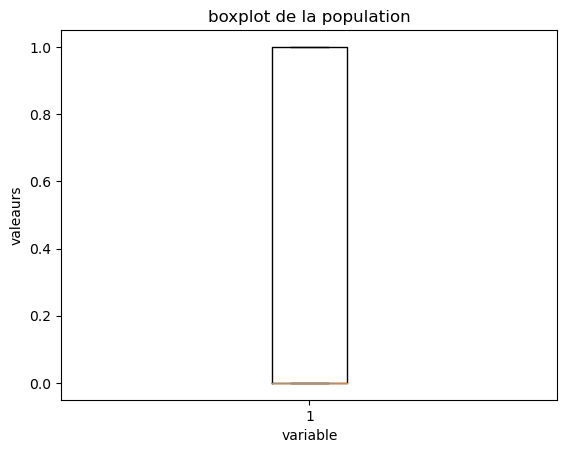

In [99]:
import matplotlib.pyplot as plt
#plt.boxplot(data['pclass'])
plt.boxplot(data['survived'])
plt.title("boxplot de la population")
plt.xlabel("variable")
plt.ylabel("valeaurs")

In [31]:
#solution 1 : replace the empty cell with a value n for exemple : the mean
data_filled=data.fillna(data['age'].mean(),inplace=False)
#challange : alter data quality 
#other alternative :
#data.fillna(data['age'].mean(),inplace=True)

In [32]:
data_filled.shape

(1309, 4)

In [86]:
data_filled.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,12.883199
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,29.881135
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


# the dropna() method

In [35]:
# solution 2 : remove the entire row with missing data
data_with_dropped_narows=data.dropna(axis=0)
#challenge:lose data


In [36]:
data_with_dropped_narows.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


# data analysis

In [38]:
#continue with the 'data_dropped' dataset
#among the 1046 passangers , we want to obtain
#the count of passengers by class
data_with_dropped_narows['pclass'].value_counts()

pclass
3    501
1    284
2    261
Name: count, dtype: int64

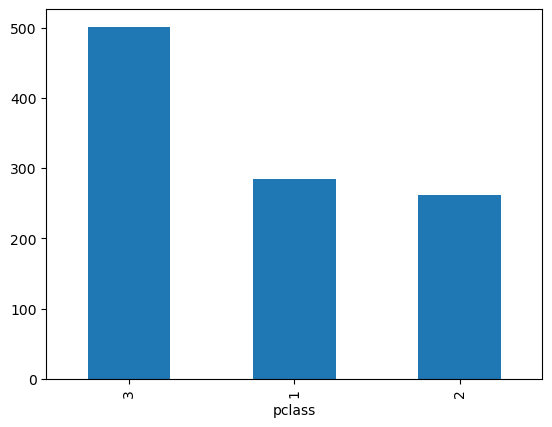

In [42]:
#create a chart with this data
data_with_dropped_narows['pclass'].value_counts().plot.bar()
plt.show()
#pandas works in conjunction with matplotlib
# so you have access to matplotlib method
#pandas and matplotlib ara manually linkkes in this way


<Axes: >

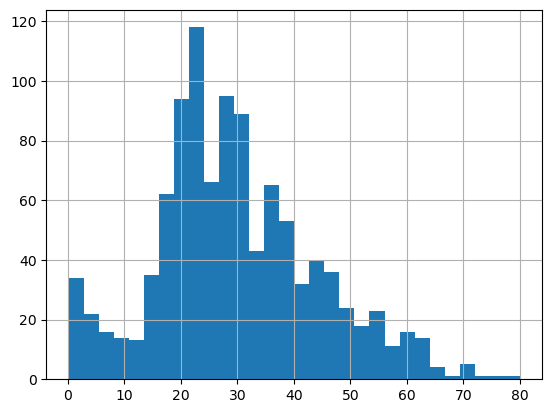

In [44]:
#create the histogram of the age distribution
data_with_dropped_narows['age'].hist(bins=30)#it's the number of histogram classes

In [88]:
# perform analysis according to the gender
new_data=data_with_dropped_narows.groupby(['genre']).max()
new_data

,pclass,survived,age
genre,,,
female,3,1,76.0
male,3,1,80.0


In [51]:
#group passangers according to class and gender
new_data=data_with_dropped_narows.groupby(['genre','pclass']).mean()
new_data

,pclass,survived,age
genre,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [53]:
new_data=data_with_dropped_narows.groupby(['pclass','genre']).mean()
new_data

survived        age
pclass genre                      
1      female  0.962406  37.037594
       male    0.350993  41.029250
2      female  0.893204  27.499191
       male    0.145570  30.815401
3      female  0.473684  22.185307
       male    0.169054  25.962273

In [54]:
data=pd.read_table('titanic_data.txt')
data.head()

,pclass,survived,name,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,"151,55",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [55]:
#method1  : assing index col while loading it 
data=pd.read_table('titanic_data.txt',index_col='name')
data.head()

,pclass,survived,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,"151,55",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [56]:
# method 2
#reload data
data=pd.read_table('titanic_data.txt')
#change indecies of the dataframe from numbers to names
#let the colmn names play the role of indecies
data=data.set_index('name')
#display the column age
data.head()

,pclass,survived,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,"151,55",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# indexing or extracting data

In [57]:
# extract the first 10 rows
data['age'][0:10]

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
Anderson, Mr. Harry                                48.0000
Andrews, Miss. Kornelia Theodosia                  63.0000
Andrews, Mr. Thomas Jr                             39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)      53.0000
Artagaveytia, Mr. Ramon                            71.0000
Name: age, dtype: float64

# boolean Mask 

In [58]:
#extract rows with age < 16
data['age']<16

name
Allen, Miss. Elisabeth Walton                      False
Allison, Master. Hudson Trevor                      True
Allison, Miss. Helen Loraine                        True
Allison, Mr. Hudson Joshua Creighton               False
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    False
                                                   ...  
Zabour, Miss. Hileni                                True
Zabour, Miss. Thamine                              False
Zakarian, Mr. Mapriededer                          False
Zakarian, Mr. Ortin                                False
Zimmerman, Mr. Leo                                 False
Name: age, Length: 1309, dtype: bool

In [60]:
#afficher la base avec les passengers mineurs
#diplay the dataset encomprasing outh passengers (yoouth age <=16 yearsold )
data[data['age']<16]

,pclass,survived,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Carter, Master. William Thornton II",1,1,male,11.0000,1,2,113760,120,B96 B98,S,4,NaN,"Bryn Mawr, PA"
"Carter, Miss. Lucile Polk",1,1,female,14.0000,1,2,113760,120,B96 B98,S,4,NaN,"Bryn Mawr, PA"
"Dodge, Master. Washington",1,1,male,4.0000,0,2,33638,"81,8583",A34,S,5,NaN,"San Francisco, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"van Billiard, Master. Walter John",3,0,male,11.5000,1,1,A/5. 851,"14,5",NaN,S,NaN,1.0,NaN
"Van Impe, Miss. Catharina",3,0,female,10.0000,0,2,345773,"24,15",NaN,S,NaN,NaN,NaN
"Vestrom, Miss. Hulda Amanda Adolfina",3,0,female,14.0000,0,0,350406,"7,8542",NaN,S,NaN,NaN,NaN


In [61]:
#group passengers per class
data[data['age']<16]['pclass'].value_counts()
#-> find out 79 passengers have the class 3

pclass
3    79
2    28
1     8
Name: count, dtype: int64

# indew localisation

# iloc

In [93]:
# indexing : extract elements of the first row and second colomn
data.iloc[1,2]

2

In [63]:
#slicing : extract columns from 0 to 2 along with associated columns
print('les deux premiers elements')
print(data.iloc[0:6,0:3])

les deux premiers elements
                                                 pclass  survived   genre
name                                                                     
Allen, Miss. Elisabeth Walton                         1         1  female
Allison, Master. Hudson Trevor                        1         1    male
Allison, Miss. Helen Loraine                          1         0  female
Allison, Mr. Hudson Joshua Creighton                  1         0    male
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1         0  female
Anderson, Mr. Harry                                   1         1    male


In [64]:
#skip could also be applied
print(data.iloc[0:6:2,0:3]) # pas 2

                                                 pclass  survived   genre
name                                                                     
Allen, Miss. Elisabeth Walton                         1         1  female
Allison, Miss. Helen Loraine                          1         0  female
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1         0  female


# loc

In [97]:
# loc is equivalent to iloc but operates on columns (use colun name)
data.iloc[0:3,data.columns.get_loc('age')]

name
Allen, Miss. Elisabeth Walton     29.0000
Allison, Master. Hudson Trevor     0.9167
Allison, Miss. Helen Loraine       2.0000
Name: age, dtype: float64

In [66]:
#use different columns for iloc
data[['age','survived']].iloc[0:3]

,age,survived
name,,
"Allen, Miss. Elisabeth Walton",29.0000,1
"Allison, Master. Hudson Trevor",0.9167,1
"Allison, Miss. Helen Loraine",2.0000,0


# advanced Operrations on dataframes 

In [69]:
# augmenter les ages d'unr annee
#map()
data['age'].map(lambda x:x+1)

name
Allen, Miss. Elisabeth Walton                      30.0000
Allison, Master. Hudson Trevor                      1.9167
Allison, Miss. Helen Loraine                        3.0000
Allison, Mr. Hudson Joshua Creighton               31.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    26.0000
                                                    ...   
Zabour, Miss. Hileni                               15.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          27.5000
Zakarian, Mr. Ortin                                28.0000
Zimmerman, Mr. Leo                                 30.0000
Name: age, Length: 1309, dtype: float64

In [73]:
import numpy as np

#exple lambda
f=lambda x,y : np.sin(x)-np.exp(y)

In [74]:
f(5,6)

-404.38771776739827

In [76]:
# create new colmon
data['new clomn']=data['age']+1

In [77]:
data.head()

,pclass,survived,genre,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,new clomn
name,,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO",30.0000
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,"151,55",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.9167
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0000
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,"151,55",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",31.0000
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,"151,55",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",26.0000


In [95]:
# encode genre feature as follows female : 1 and 2
# step1 : replace names with numbers
data['genre'].replace(['female','male'],[1,2], inplace=True)
data['genre'].head()
#data['genre'].replace(['female','male'],np.arange(1,3), inplace=True)
# step 2 : declare the column as categolical
#use catcodes
data['genre'].astype('category').cat.codes

name
Allen, Miss. Elisabeth Walton                      0
Allison, Master. Hudson Trevor                     1
Allison, Miss. Helen Loraine                       0
Allison, Mr. Hudson Joshua Creighton               1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0
                                                  ..
Zabour, Miss. Hileni                               0
Zabour, Miss. Thamine                              0
Zakarian, Mr. Mapriededer                          1
Zakarian, Mr. Ortin                                1
Zimmerman, Mr. Leo                                 1
Length: 1309, dtype: int8

In [81]:
#methode : use catcods only 
data['genre'].astype('category').cat.codes

name
Allen, Miss. Elisabeth Walton                      0
Allison, Master. Hudson Trevor                     1
Allison, Miss. Helen Loraine                       0
Allison, Mr. Hudson Joshua Creighton               1
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0
                                                  ..
Zabour, Miss. Hileni                               0
Zabour, Miss. Thamine                              0
Zakarian, Mr. Mapriededer                          1
Zakarian, Mr. Ortin                                1
Zimmerman, Mr. Leo                                 1
Length: 1309, dtype: int8

# pandas and time series

In [100]:
# load historical data of netiflix stocks
data= pd.read_csv('NFLX.csv')

In [101]:
# get an overview of the data
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-06-23,418.589996,425.820007,417.730011,424.019989,424.019989,8293900
247,2023-06-26,422.440002,430.959991,414.899994,415.940002,415.940002,4640000
248,2023-06-27,417.390015,420.880005,411.500000,417.079987,417.079987,4818100
249,2023-06-28,423.100006,437.290009,422.890015,429.839996,429.839996,8811300
250,2023-06-29,434.329987,437.850006,426.149994,428.239990,428.239990,4926100


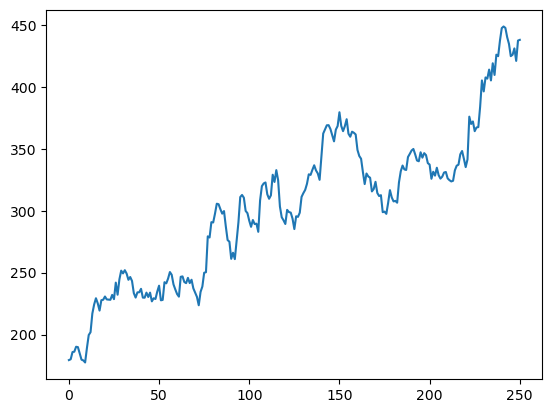

In [104]:
#visiualize the of the hoghty
data['High'].plot()
plt.show()

In [112]:
# revenir au code de chargement du data frame et indiquer l'index va prendre 
data=pd.read_csv('NFLX.csv',index_col='Date',parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,177.070007,179.449997,170.300003,174.869995,174.869995,7894700
2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5201600
2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300
2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400
2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500


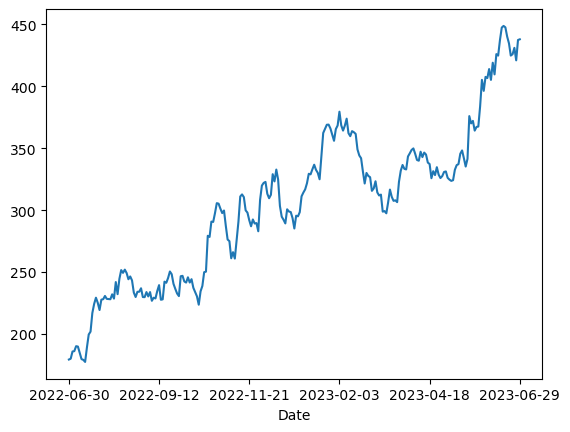

In [111]:
#visiualize the of the hoghty
data['High'].plot()
plt.show()

In [115]:
#verify that index is of type date
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

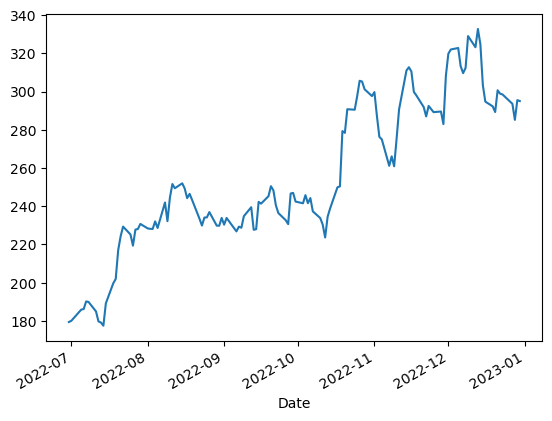

In [118]:
#use the slicing technique to display the plot of '2022.0)'
data.loc['2022']['High'].plot()
plt.show()

<Axes: xlabel='Date'>

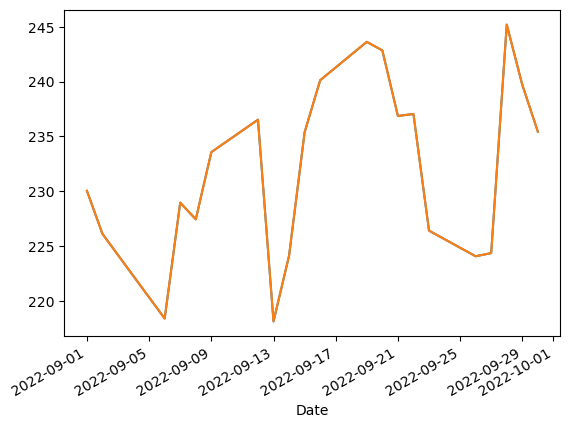

In [119]:
# slicing usinf dates
data.loc['2022-09']['Close'].plot()
data.loc['2022-09','Close'].plot()

In [122]:
# dispolay the evolution of the  mean values of the 'Close' stocks for each month
# stocks for each month 
# resample (M) each month #     A verifier
data.loc['2022':'2023']['Close'].resample('M').plot()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'plot'

<Axes: xlabel='Date'>

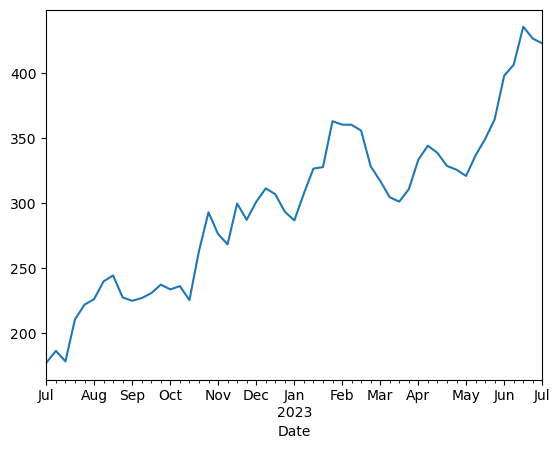

In [123]:
# perfoem weekly visualisation  of the mean
data.loc['2022':'2023']['Close'].resample('W').mean().plot()

In [124]:
# group several statistics in the same array
data['Open'].resample('M').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2022-06-30,177.070007,NaN,177.070007,177.070007
2022-07-31,196.233501,19.644824,170.500000,224.600006
2022-08-31,232.726522,8.589227,221.929993,248.110001
2022-09-30,231.145716,7.397684,219.820007,245.050003
2022-10-31,255.223812,28.871007,212.690002,298.329987
2022-11-30,283.185714,14.635677,259.660004,309.940002
2022-12-31,301.709522,14.418675,281.239990,328.000000
2023-01-31,332.457001,21.864769,298.059998,368.769989
2023-02-28,349.309474,15.402589,319.299988,372.410004


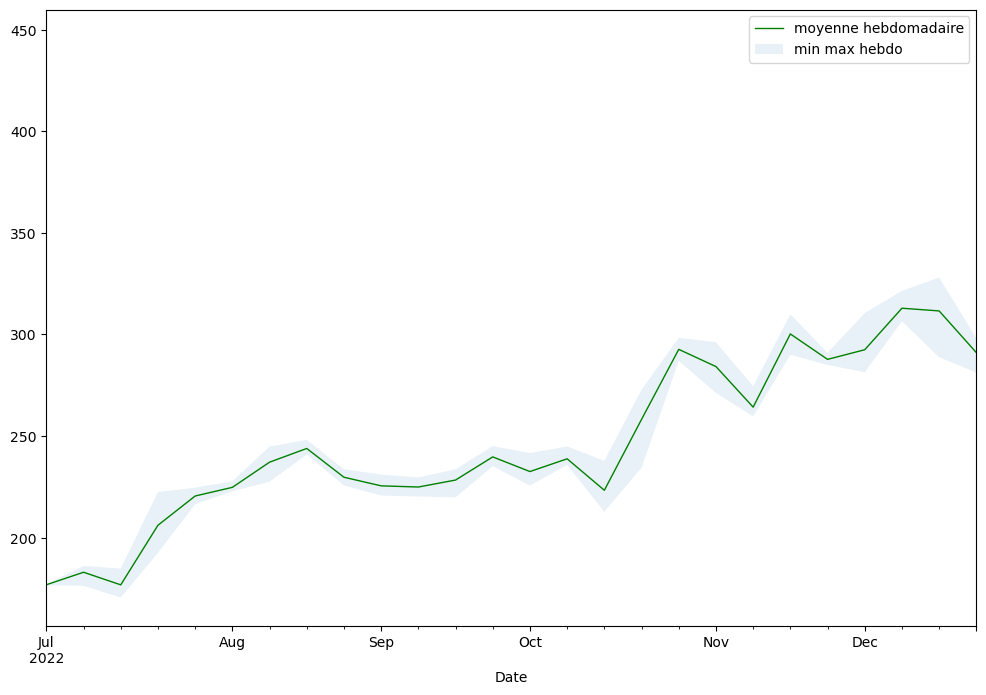

In [131]:
#
graphique=data['Open'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
graphique['mean']['2022'].plot(color='g',lw=1,label='moyenne hebdomadaire')
#create a variation the (min max)
plt.fill_between(graphique.index, graphique['min'],graphique['max'], alpha=0.1, label="min max hebdo")
plt.legend()

In [132]:
# make predictions using moving average method
# predection for period t is istableshed by evaluating the mean of the previous obserd demand during the three past periods
# if the time  window is 3
data.loc['2022','Close'].rolling(window=3).mean()

Date
2022-06-30           NaN
2022-07-01           NaN
2022-07-05    180.233332
2022-07-06    183.296667
2022-07-07    186.403336
                 ...    
2022-12-23    296.889994
2022-12-27    292.293335
2022-12-28    285.336670
2022-12-29    284.056671
2022-12-30    287.626668
Name: Close, Length: 128, dtype: float64

<Axes: xlabel='Date'>

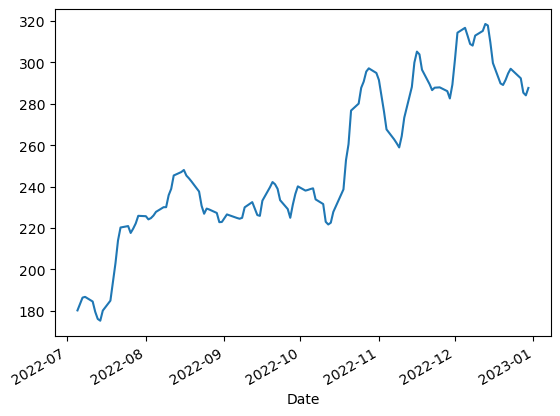

In [133]:
data.loc['2022','Close'].rolling(window=3).mean().plot()

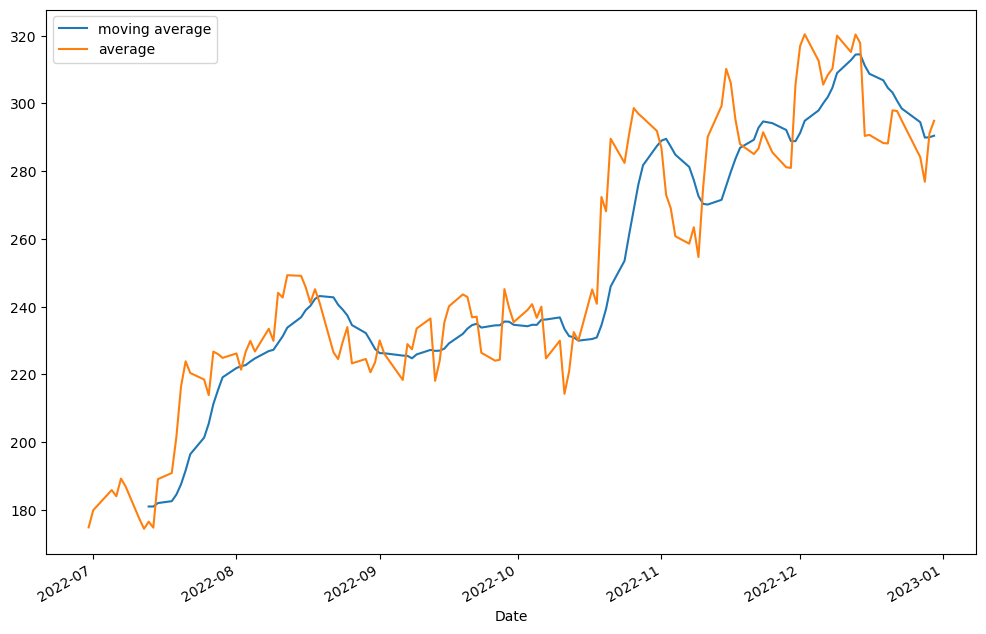

In [135]:
# simultaniously visualize the observed mean values and rolli,g mean evolution
plt.figure(figsize=(12,8))
data.loc['2022','Close'].rolling(window=9).mean().plot(label='moving average')
data.loc['2022','Close'].plot(label='average')
plt.legend()
